# 主成分分析

エルミート行列の対角化の応用である主成分分析について解説します．
主成分分析とは，多変量解析の1つで，情報を縮約する手法です．
一般に多変量解析とは，扱う変量の個数が多いのでそのままでは見通しが効かないようなデータについて，そのデータの特徴を代表するような新しい指標を作り，少ない変量によってデータ全体を取り扱うための手法です．


まず，対象となるデータがあります．

| Key | Variate_1 | Variate_2 | $\cdots$ | Variate_n |
|:---:|:---:|:---:|:---:|:---:|
| $Id_1$ | $x_{11}$ | $x_{12}$ | $\cdots$ | $x_{1n}$ |
| $Id_2$ | $x_{21}$ | $x_{22}$ | $\cdots$ | $x_{2n}$ |
| $Id_3$ | $x_{31}$ | $x_{32}$ | $\cdots$ | $x_{3n}$ |
| $\vdots$ | $\vdots$ | $\vdots$ | $\cdots$ | $\vdots$ |
| $Id_m$ | $x_{m1}$ | $x_{m2}$ | $\cdots$ | $x_{mn}$ |

変量の説明：
- Key：個々の対象を特定するための識別子
- Variate_1～Variate_n：実数値を取る個別の変量

このデータにおいて，個々の対象は$n$個の変量によって特徴付けられています．
この変量の個数が多いと，対象を分析したり比較することが人間の目では難しくなります．
そこで，$n$個の変量を特徴を持った少ない変量で表せると，人間による判断がしやすくなります．
例えば，この$n$個の変量を2つの変量で表します．

必要になるのは分散共分散行列ですが，その基礎となる統計量の計算式を記載します．

平均値： $\displaystyle \overline{x}_i = \frac{1}{m}{\sum_{k=1}^{m}x_{ki}}$

分散： $\displaystyle \sigma_i^2 = \frac{1}{m}\sum_{k=1}^{m}{(x_{ki}-\overline{x}_i)}^2$

共分散： $\displaystyle \sigma_{ij} = \frac{1}{m}{\sum_{k=1}^{m}{(x_{ki}-\overline{x}_i)}{(x_{kj}-\overline{x}_j)}}$

定義より，${\sigma_i^2}=\sigma_{ii}$および，$\sigma_{ij}=\sigma_{ji}$ということが分かります．

全ての変量の分散および共分散をまとめた行列を分散共分散行列と言い，ここでは$\bf S$で表します．

$${\bf S}=
\left(\begin{array}{c}
\sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1n} \\
\sigma_{21} & \sigma_2^2 & \ddots & \sigma_{2n} \\
\vdots & \ddots & \ddots & \vdots \\
\sigma_{n1} & \sigma_{n2} & \cdots & \sigma_n^2 \\
\end{array}\right)$$

この分散共分散行列を求めるところまでは，基礎的な記述統計です．
この次のステップは，この分散共分散行列を$n$次元ユークリッド空間上の変換とみなして対角化を行います．
この部分が主成分分析の中核部分であり，線形代数が担っているところです．

分散共分散行列の各成分は全て実数です．
定義により$\sigma_{ij}=\sigma_{ji}$となっているので，対称行列になっています．
したがって，対称行列の対角化定理を適用することができます．

分散共分散行列$\bf S$の固有値を $\lambda_1,\lambda_2,\cdots,\lambda_n$とし，対応する固有ベクトルを ${\bf u}_1,{\bf u}_2,\cdots,{\bf u}_n$とします．

このインデックスの付け方は，固有値の降順
$\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_n \geq 0$
とします．

データ
${\bf x}_i = 
\left(\begin{array}{c}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{in} \\
\end{array}\right)$
を固有ベクトルを基底として表現すると，次のようになります．

> <font color=green>${\bf x}_i =
\left<{\bf u}_1,{\bf x}_i\right>{\bf u}_1+
\left<{\bf u}_2,{\bf x}_i\right>{\bf u}_2+
\cdots+
\left<{\bf u}_n,{\bf x}_i\right>{\bf u}_n$ </font>


固有値の総和に対するある固有値の比率を寄与率と言います．

> $\displaystyle \text{主成分}{\bf u}_i\text{の寄与率} = \frac{\lambda_i}{\lambda_1+\lambda_2+\cdots+\lambda_n}$

固有値が大きいということは，その固有ベクトル方向へのデータのバラツキが大きいということです．
逆に固有値が小さい場合は，その固有ベクトル方向へのデータのバラツキが小さいので，その固有ベクトル成分を無視し近似することができます．
例えば，データ${\bf x}_i$を第2主成分までの近似にすると，次式のようになります．

> <font color=green>${\bf x}_i\text{の第2主成分までの近似} \approx 
\left<{\bf u}_1,{\bf x}_i\right>{\bf u}_1 + \left<{\bf u}_2,{\bf x}_i\right>{\bf u}_2$</font>

以上が主成分分析についての線形代数からの説明です．

*****
主成分分析の具体的な問題について線形代数によって解くプロセスをPythonで実践します．

### 問題設定

学生20名について5科目のテスト結果があります．
このテスト結果から累積寄与率75%以上の主成分を求めます．

| Student | Algebra | Analysis | Calculus | Geometry | Logic |
:---:|:---:|:---:|:---:|:---:|:---:|
| s01 | 73 | 61 | 69 | 34 | 70 |
| s02 | 68 | 67 | 54 | 73 | 73 |
| s03 | 52 | 55 | 69 | 45 | 50 |
| s04 | 53 | 55 | 50 | 80 | 52 |
| s05 | 38 | 55 | 77 | 33 | 47 |
| s06 | 58 | 44 | 33 | 49 | 48 |
| s07 | 55 | 70 | 67 | 50 | 62 |
| s08 | 46 | 48 | 31 | 42 | 44 |
| s09 | 52 | 52 | 47 | 33 | 51 |
| s10 | 70 | 49 | 44 | 44 | 56 |
| s11 | 62 | 50 | 46 | 52 | 67 |
| s12 | 50 | 52 | 42 | 48 | 53 |
| s13 | 50 | 50 | 45 | 94 | 50 |
| s14 | 91 | 50 | 49 | 89 | 75 |
| s15 | 47 | 57 | 98 | 49 | 49 |
| s16 | 48 | 50 | 28 | 39 | 48 |
| s17 | 49 | 50 | 45 | 53 | 46 |
| s18 | 49 | 50 | 50 | 48 | 47 |
| s19 | 27 | 40 | 28 | 48 | 38 |
| s20 | 51 | 55 | 61 | 53 | 47 |


## Pythonによる解法

Pythonを使って線形代数の手法によって，主成分分析を解いていきます．

まずは，NumPyライブラリーをインポートします．

In [1]:
import numpy as np

テスト結果のデータを変数として定義します．
1種目のテスト結果を行データとして定義します．

In [2]:
testResults = np.array([
[73,68,52,53,38,58,55,46,52,70,62,50,50,91,47,48,49,49,27,51],
[61,67,55,55,55,44,70,48,52,49,50,52,50,50,57,50,50,50,40,55],
[69,54,69,50,77,33,67,31,47,44,46,42,45,49,98,28,45,50,28,61],
[34,73,45,80,33,49,50,42,33,44,52,48,94,89,49,39,53,48,48,53],
[70,73,50,52,47,48,62,44,51,56,67,53,50,75,49,48,46,47,38,47]])

分散共分散行列は，<font color=green>numpy.cov()</font>関数によって求めます．

> np.cov(testResults,bias=True)

分散共分散の計算式の分母になる数を全体のデータ数にするために，<font color=green>bias=True</font>を引き数で与える必要があります．
biasのデフォルトはFalseで，その場合は分母が$n-1$となります．

In [3]:
Cov = np.cov(testResults,bias=True)
Cov

array([[ 174.6475,   25.75  ,   15.4075,   82.34  ,  114.8575],
       [  25.75  ,   46.4   ,   74.15  ,    5.25  ,   37.55  ],
       [  15.4075,   74.15  ,  296.0275,  -29.87  ,   35.6775],
       [  82.34  ,    5.25  ,  -29.87  ,  292.26  ,   57.38  ],
       [ 114.8575,   37.55  ,   35.6775,   57.38  ,  100.1275]])

分散共分散行列の固有値と固有ベクトルを<font color=green>numpy.linalg.eig()</font>関数によって求めます．

> eigen_values,eigen_vectors = np.linalg.eig(Cov)

In [4]:
eigen_values,eigen_vectors = np.linalg.eig(Cov)

固有値を確認します．

In [5]:
eigen_values

array([   7.81354792,   28.49112656,  159.08461596,  380.79879371,
        333.27441584])

固有値および寄与率，累積寄与率をまとめると次表になります．
固有値の並び順を降順にしています．

|  | 固有値 | 寄与率 | 累積寄与率 | 配列のインデックス |
|:---:|:---:|:---:|:---:|:---:|
| $\lambda_1$ | 381 | 41.9 % | 41.9 % | 3 |
| $\lambda_2$ | 333 | 36.6 % | 78.5 % | 4 |
| $\lambda_3$ | 159 | 17.5 % | 96.0 % | 2 |
| $\lambda_4$ |  28 |  3.1 % | 99.1 % | 1 |
| $\lambda_5$ |   8 |  0.9 % | 100 %  | 0 |

第2主成分までの累積寄与率が78.5%なので，テスト結果を第1主成分と第2主成分で近似します．

固有ベクトルを確認しますが，ここで注意すべきことは eigen_values に格納されている固有値が降順になっていないことです．
上表の配列のインデックスに注意して固有ベクトルを抽出します．

In [6]:
eigen_vectors

array([[-0.40242074,  0.43135763, -0.60069424, -0.53580023,  0.06381759],
       [-0.57500134, -0.76816117, -0.02943167, -0.12363395,  0.25129726],
       [ 0.08110461,  0.2418918 ,  0.32089346, -0.11821135,  0.90441355],
       [-0.00713542, -0.00351944,  0.61518511, -0.72425273, -0.31135506],
       [ 0.70767375, -0.40661406, -0.39607433, -0.3988945 ,  0.1336831 ]])

第1固有ベクトルは，eigen_vectors[:,3]となります．

In [7]:
eigen_vectors[:,3]

array([-0.53580023, -0.12363395, -0.11821135, -0.72425273, -0.3988945 ])

第2固有ベクトルは，eigen_vectors[:,4]となります．

In [8]:
eigen_vectors[:,4]

array([ 0.06381759,  0.25129726,  0.90441355, -0.31135506,  0.1336831 ])

さて，最初の学生s01の第1主成分と第2主成分を求めてみます．

まず，学生s01のテストデータは，testResults[0:5,0]として取り出せます．

In [9]:
testResults[0:5,0]

array([73, 61, 69, 34, 70])

第1主成分は第1固有ベクトルへの射影 $\left<{\bf u}_1,{\bf x}_1\right>$なので，次式で求めます．

> eigen_vectors[:,3].dot(testResults[0:5,0])

In [10]:
eigen_vectors[:,3].dot(testResults[0:5,0])

-107.35887859672198

第2主成分は第2固有値への射影 $\left<{\bf u}_2,{\bf x}_1\right>$なので，次式で求めます．

> eigen_vectors[:,4].dot(testResults[0:5,0])

In [11]:
eigen_vectors[:,4].dot(testResults[0:5,0])

81.16409623381665

学生s01のテストデータを第1主成分と第2主成分で近似するには，
$\left<{\bf u}_1,{\bf x}_1\right>{\bf u}_1 + \left<{\bf u}_2,{\bf x}_1\right>{\bf u}_2$
を計算します．

In [12]:
eigen_vectors[:,3].dot(testResults[0:5,0])*eigen_vectors[:,3] + \
eigen_vectors[:,4].dot(testResults[0:5,0])*eigen_vectors[:,4]

array([ 62.70260868,  33.66951665,  86.09694594,  52.48410894,  53.6751344 ])

ちなみに，第5主成分まで全ての和をとると，元のデータに一致します．

In [13]:
eigen_vectors[:,0].dot(testResults[0:5,0])*eigen_vectors[:,0] + \
eigen_vectors[:,1].dot(testResults[0:5,0])*eigen_vectors[:,1] + \
eigen_vectors[:,2].dot(testResults[0:5,0])*eigen_vectors[:,2] + \
eigen_vectors[:,3].dot(testResults[0:5,0])*eigen_vectors[:,3] + \
eigen_vectors[:,4].dot(testResults[0:5,0])*eigen_vectors[:,4] 

array([ 73.,  61.,  69.,  34.,  70.])

全ての学生の第1主成分を求めるには，次の式を実行します．

> eigen_vectors[:,3].dot(testResults[0:5,:])

In [14]:
ev1 = eigen_vectors[:,3].dot(testResults[0:5,:])
ev1

array([-107.3588786 , -133.09105077,  -95.35416001, -119.79057907,
        -78.91093134,  -95.05260132, -106.98764489,  -82.21576455,
        -84.09047028, -102.97059104, -109.22610721,  -94.08939299,
       -126.31570108, -155.10745485,  -98.84867226,  -82.6028187 ,
        -94.48996102,  -91.85864863,  -72.6440039 ,  -98.4700073 ])

全ての学生の第2主成分を求めるには，次の式を実行します．

> eigen_vectors[:,4].dot(testResults[0:5,:])

In [15]:
ev2 = eigen_vectors[:,4].dot(testResults[0:5,:])
ev2

array([ 81.16409623,  57.04479077,  72.21757579,  44.46747525,
        81.8946493 ,  35.7645374 ,  74.4170822 ,  35.83984127,
        55.43652975,  50.36162381,  50.89088108,  46.38386721,
        33.8711315 ,  45.00415951,  97.2499719 ,  35.22562788,
        46.03813879,  52.2506649 ,  27.23345949,  62.02656009])

最後に，第1主成分と第2主成分の分布についてグラフ表示してみます．
そのために，グラフ描画用ライブラリーである<font color=green>matplotlib.pyplot</font>をインポートします．

> import matplotlib.pyplot as plt

In [16]:
import matplotlib.pyplot as plt

散布図の作図は以下のプログラムになります．

```Python
plt.axis('scaled')                        # 表示上の縦横比を1対1にする
plt.scatter(ev1,ev2)                      # 変数ev1とev2を2軸のデータとする
plt.xlim([-160,-60])                      # X軸の範囲を-160から-60にする
plt.ylim([20,100])                        # Y軸の範囲を20から100にする
plt.xticks([-160,-140,-120,-100,-80,-60]) # X軸に付ける目盛を設定する
plt.yticks([20,40,60,80,100])             # Y軸に付ける目盛を設定する
plt.xlabel('Component-1')                 # X軸のラベルを設定する
plt.ylabel('Component-2')                 # Y軸のラベルを設定する
plt.show()                                # 図を表示する
```

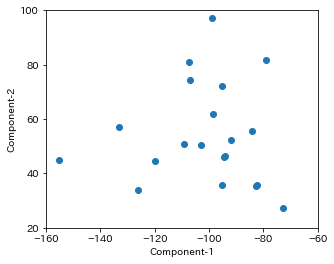

In [17]:
plt.axis('scaled')
plt.scatter(ev1,ev2)
plt.xlim([-160,-60])
plt.ylim([20,100])
plt.xticks([-160,-140,-120,-100,-80,-60])
plt.yticks([20,40,60,80,100])
plt.xlabel('Component-1')
plt.ylabel('Component-2')
plt.show()

*****
## scikit-learnによる解法

さて，Pythonで主成分分析を行うためにscikit-learn機械学習パッケージ<font color=green>sklearn.decomposition</font>ライブラリーに<font color=green>PCA</font>モジュールを使用します．
このモジュールを使うと，簡単に主成分分析ができます．
PCAオブジェクトを定義して，データを渡すだけです．
データの引き渡し方は，モジュールそれぞれに仕様があります．
PCAでは元のデータの行と列を入替えた形式でデータを与えます．

> from sklearn.decomposition import PCA  
> pca = PCA()  
> pca.fit(testResults.T)

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(testResults.T)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

主成分分析に関連する情報は，次の属性データに保管されています．

> 固有値（主成分）：pca.explained\_variance\_  
> 主成分の寄与率：pca.explained\_variance\_ratio\_  
> 固有ベクトル：pca.components\_  

固有値（主成分）の並び順は降順に揃えられています．

In [19]:
pca.explained_variance_

array([ 380.79879371,  333.27441584,  159.08461596,   28.49112656,
          7.81354792])

In [20]:
pca.explained_variance_ratio_

array([ 0.41870753,  0.36645207,  0.17492158,  0.03132743,  0.00859139])

固有ベクトルについてですが，並び順は固有値の降順に合わせてます．
また，numpy.linalg.eig()関数で固有値ベクトルを求め得た場合とは異なり，行と列が転置しています．


In [21]:
pca.components_

array([[ 0.53580023,  0.12363395,  0.11821135,  0.72425273,  0.3988945 ],
       [ 0.06381759,  0.25129726,  0.90441355, -0.31135506,  0.1336831 ],
       [-0.60069424, -0.02943167,  0.32089346,  0.61518511, -0.39607433],
       [-0.43135763,  0.76816117, -0.2418918 ,  0.00351944,  0.40661406],
       [-0.40242074, -0.57500134,  0.08110461, -0.00713542,  0.70767375]])

第1主成分に対応する固有ベクトルはpca.components\_[0]となります．
numpy.linalg.eig()関数による方法と比較すると，符号が逆転しています．
固有ベクトルを求めるときに大きさを1に揃えても，ベクトルの向きは2種類ありますので，符号が反対になることは十分あります．

In [22]:
pca.components_[0]

array([ 0.53580023,  0.12363395,  0.11821135,  0.72425273,  0.3988945 ])

また，分散共分散行列はpca.get_covariance()関数によって得ることができます．
この結果は，numpy.cov(testResults,bias=True)と同じ行列が得られますので，ご確認ください．

In [23]:
pca.get_covariance()

array([[ 174.6475,   25.75  ,   15.4075,   82.34  ,  114.8575],
       [  25.75  ,   46.4   ,   74.15  ,    5.25  ,   37.55  ],
       [  15.4075,   74.15  ,  296.0275,  -29.87  ,   35.6775],
       [  82.34  ,    5.25  ,  -29.87  ,  292.26  ,   57.38  ],
       [ 114.8575,   37.55  ,   35.6775,   57.38  ,  100.1275]])

numpy.linalg.eig()関数の場合と同様に，最初の学生s01のデータの第1主成分を求めてみます．  
pca.components\_[0]のドット積の引数としてtestResults[0:5,0]を渡します．

In [24]:
pca.components_[0].dot(testResults[0:5,0])

107.35887859672201

さらに，最初の学生のテスト結果を第2主成分までの近似を求めてみます．

In [25]:
pca.components_[0].dot(testResults[0:5,0])*pca.components_[0] + \
pca.components_[1].dot(testResults[0:5,0])*pca.components_[1]

array([ 62.70260868,  33.66951665,  86.09694594,  52.48410894,  53.6751344 ])

*****
私達の目的は主成分分析の手法をマスターすることではなく，その基礎にある線形代数の理論を習得することです．
主成分分析や回帰分析のツールの使い方を覚えるのは難しくはありません．
しかし，理論を知らずにツールを使うということは，単なる作業者です．
いずれ，そういう作業は自動化されるかAIに取って代わられます．

理論をしっかり身に付ければ，創造的な仕事に身を置くことも可能になります．
ここまで理解するには長い学習プロセスを実施してきました．
決して簡単な事ではないので，是非とも復習することをお薦めいたします．
*****